# Separability of legal documents according to precedent citations

- Lucas Emanuel Resck Domingues
- Machine Learning assignment
- Professor Rodrigo Targino, FGV-EMAp

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span><ul class="toc-item"><li><span><a href="#Binding-Precedents" data-toc-modified-id="Binding-Precedents-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Binding Precedents</a></span></li><li><span><a href="#Dataset-description" data-toc-modified-id="Dataset-description-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dataset description</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li></ul></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Results-and-discussion" data-toc-modified-id="Results-and-discussion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results and discussion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Setup

In [28]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

sns.set()

In [12]:
data_path = os.path.join('../data/docs')

## Introduction

The Brazilian Supreme Court (STF) is the highest law court in Brazil. It produces a huge number of documents during its functioning, \textit{e.g.}, there were produced more than 1 million STF decisions between 2011 and 2020 \cite{}. STF is not the only institution that deals with overload: it is spread all over the Brazilian Judicial System.

One approach to solve this problem is the so-called precedent: when a similar case has to be decided again, this new decision can be taken based on the referenced old decision. This way, cases are solved faster. Many precedents about a subject in a court are consolidated in what is called a ``súmula'', a document that resumes the court understanding about that subject. However, the application of this understanding is not mandatory, and the judge can take a different decision. This situation can lead not only to judicial inefficiency, but also to judicial insecurity.

With this situation in mind, STF was allowed, in 2004, by Constitutional Amendment, to create "Súmulas Vinculantes", which we will call here "Binding Precedents", or just BPs. They are basically the old súmulas, but with mandatory application. These BPs are frequently cited in the STF decisions.

It seems trivial that documents that cite the same precedents have the same subjects, and documents that cite different precedents have different subjects, in general. However, can machine learning models and algorithms identify this pattern themselves? That is, if a trained machine learning model is presented to a document, can it predict which precedent is being cited? These questions are very relevant because, if the answer is yes, artificial intelligence algorithms can be very helpful in assisting legal experts during their analysis, considering the big number of long legal documents.

This situation of predicting the correct precedent is what is being called here as ``separability'' of documents. In this assignment, this separability will consider Binding Precedents in STF decisions. This work is organized as follows.

## Dataset

### Binding Precedents

Until June 2021, 58 Binding Precendents have already been created. For example, take a look at BP 10's text:

\textit{``Viola a cláusula de reserva de plenário (CF, artigo 97) a decisão de órgão fracionário de tribunal que, embora não declare expressamente a inconstitucionalidade de lei ou ato normativo do Poder Público, afasta sua incidência, no todo ou em parte.''}

Although it can lead to some insights, we are not interested in studying the meaning of all the BPs.

### Dataset description

The dataset used thoughout this work is composed by decisions generated by STF that cite at least one Binding Precedent. Although these documents are public, they are very difficult to be accessed, mainly when it is necessary a big amount of data. This way, we use a dataset gathered in the context of Supremo em Números project \cite{}, from FGV's Law School.

The dataset, in the way we have it, is composed by 58 CSV files of structured data, with columns:
- title: document title, formed by date, document type and an ID;
- raw_text: document's raw text;
- i_cite: list of cited precedents, including BPs, already extracted from the raw texts;
- date: document's publication date.

See a sample:

In [13]:
pd.read_csv(os.path.join(data_path, 'docs_sv_10.csv')).sample()

,title,raw_text,i_cite,date
1801,19700101_Rcl_11860_3722572,RECLAMAÇÃO. MEDIDA CAUTELAR. RESPONSABILIDADE ...,"['sum. vinc. 10 N/A STF N/A', 'adc 16 2497093 ...",1970-01-01


In [14]:
print(pd.read_csv(os.path.join(data_path, 'docs_sv_10.csv')).sample().to_latex())

\begin{tabular}{lllll}
\toprule
{} &                       title &                                           raw\_text &                                             i\_cite &        date \\
\midrule
12592 &  20100930\_Rcl\_10460\_3418590 &  DECISÃO\textbackslash n\textbackslash nRECLAMAÇÃO. ADMINISTRATIVO. ALEGADO... &  ['sum. vinc. 10 N/A STF N/A 11937 1187', 'rcl ... &  2010-09-30 \\
\bottomrule
\end{tabular}



### Exploratory Data Analysis

- Citações cada BP
- raw_text
    - distribuição quantidade de palavras
    - repetições
- date
    - distribuition
    - 1970 problem

In [15]:
dfs = []
for bp in range(1, 58+1):
    try:
        df = pd.read_csv(os.path.join(data_path, 'docs_sv_{}.csv'.format(bp)))
        dfs.append(df)
    except pd.errors.EmptyDataError as e:
        dfs.append(None)

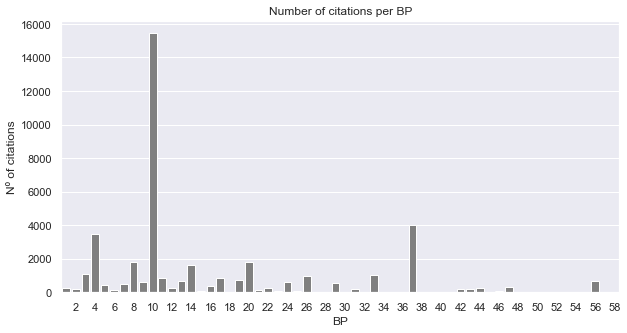

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(range(1, 58+1)), y=[len(df) if df is not None else 0 for df in dfs], color='gray', ax=ax)
ax.set_xticklabels([str(i) if i % 2 == 0 else '' for i in range(1, 59)])
plt.title('Number of citations per BP')
plt.xlabel('BP')
plt.ylabel('Nº of citations');

## Methodology

- Accuracy
- Confusion matrix
<!-- - RoC curve -->
<!-- - Cross validation -->


- TF-IDF
- Doc2vec
<!-- - Universal Sentence Encoder -->
- Dimensionality reduction
    - Truncated SVD
- more vectors?


- Linear regression
    - Ridge e LASSO
- Linear Discriminant Analysis
<!-- - QDA -->
- KNN
<!-- - Árvores -->
<!-- - Bagging -->
- Random forest
<!-- - Boosting -->
- Support Vector Machines
- Principal Component Analysis
- K-means
- Hierarchical clustering
<!-- - Gaussian Mixture -->
- Latent Dirichlet Analysis

## Results and discussion

## References